In [111]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv("../input/train.csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


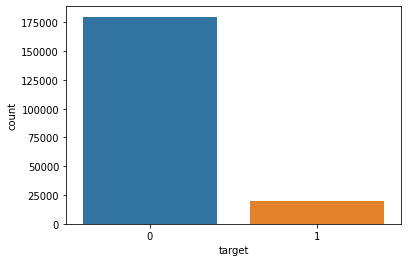

In [113]:
import seaborn as sns
sns.countplot(df["target"]);

In [5]:
from sklearn import model_selection

df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.target.values

skf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X=df, y=y)):
    df.loc[val_idx, "kfold"] = fold

df.to_csv("../input/train_folds.csv", index=False)

In [114]:
train = pd.read_csv("../input/train_folds.csv")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,kfold
0,train_179270,0,12.6670,-8.2640,12.2246,5.1135,9.9873,-4.4061,5.8543,10.3610,...,12.3649,1.3688,4.4547,14.9203,1.2843,-6.8354,8.3008,16.9694,-0.2180,0
1,train_8620,0,7.1337,-3.3894,10.5516,4.5148,13.2428,-13.3373,5.7906,22.8352,...,10.7215,-0.7006,3.8318,11.6210,-1.2492,6.9051,8.1987,13.6408,-3.8620,0
2,train_75184,1,13.4617,-7.5920,7.8741,9.8813,8.0818,-6.9046,4.5100,15.1907,...,4.1234,1.5338,0.9601,18.4373,-1.0499,2.1792,10.3498,18.0188,-3.4607,0
3,train_197238,0,11.0380,3.9730,11.9388,9.7430,11.7759,-16.3134,6.9064,20.9315,...,11.0323,0.7727,7.8554,21.6070,-2.3528,-1.0275,8.2812,12.9121,2.5766,0
4,train_123902,0,12.1796,-6.7531,10.1425,5.3293,9.0578,-18.7689,5.3685,22.8782,...,3.7274,0.0488,7.0516,17.3483,0.7411,6.8619,10.1772,10.0919,7.0014,0


In [5]:
#sns.countplot(train["kfold"]);

In [115]:
import numpy as np

total = train.isnull().sum()
percent = (train.isnull().sum()/train.isnull().count() * 100)

table = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
np.transpose(table)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,kfold
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,kfold
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537,2.000000
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015,1.414217
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800,0.000000
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475,1.000000
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550,2.000000
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800,3.000000
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700,4.000000


In [ ]:
#sns.pairplot(data=train, hue="target");

In [ ]:
#sns.catplot(x='var_0', y='var_1', data=train, kind='violin', hue='target');

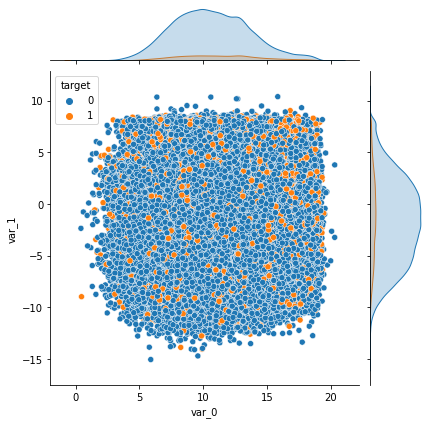

In [117]:
sns.jointplot(x="var_0", y="var_1", data=train, hue="target");

In [118]:
features = [f for f in train.columns if f not in ["ID_code", "target", "kfold"]]

train["sum"] = train[features].sum(axis=1)
train["min"] = train[features].min(axis=1)
train["max"] = train[features].max(axis=1)
train["mean"] = train[features].mean(axis=1)
train["std"] = train[features].std(axis=1)
train["skew"] = train[features].skew(axis=1)
train["kurt"] = train[features].kurtosis(axis=1)
train["med"] = train[features].median(axis=1)

In [119]:
train.loc[:, "sum":].head()

,sum,min,max,mean,std,skew,kurt,med
0,1381.1278,-18.9091,38.9818,6.905639,9.735145,0.160748,0.535521,6.72595
1,1292.2418,-20.0407,42.9500,6.461209,8.981744,0.147977,1.521339,5.68200
2,1450.9821,-24.5807,43.6822,7.254910,9.376557,0.483422,1.833316,6.64330
3,1384.4663,-22.6960,43.6647,6.922332,9.322367,0.244884,1.259855,6.91460
4,1480.0718,-22.8357,43.2586,7.400359,10.028851,0.225067,2.192845,7.00085


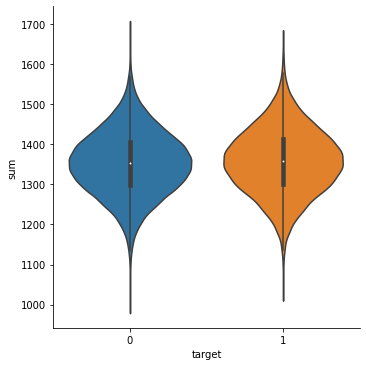

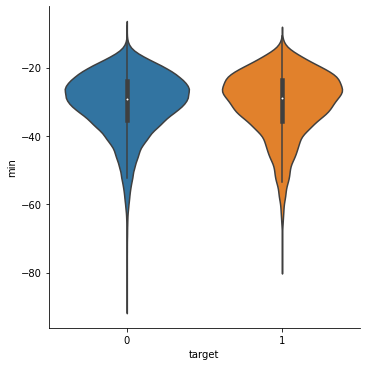

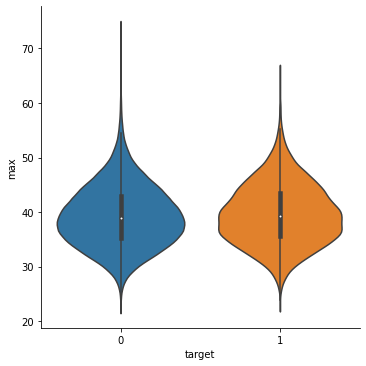

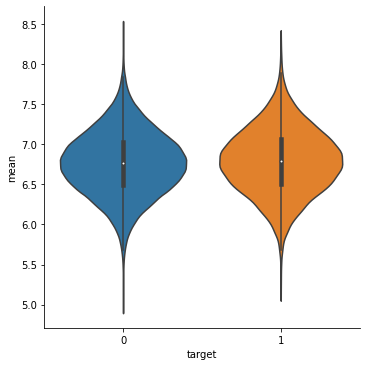

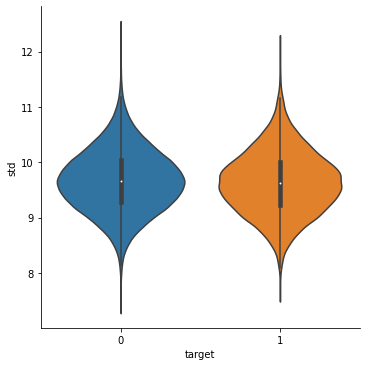

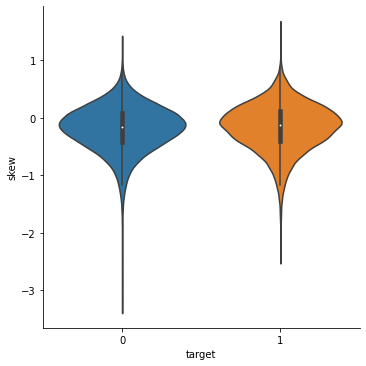

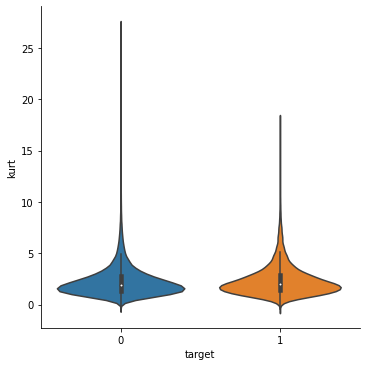

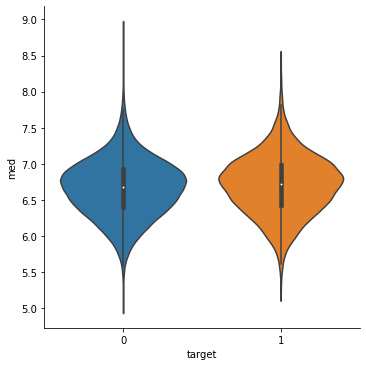

In [120]:
sns.catplot(x="target", y="sum", data=train, kind="violin");
sns.catplot(x="target", y="min", data=train, kind="violin");
sns.catplot(x="target", y="max", data=train, kind="violin");
sns.catplot(x="target", y="mean", data=train, kind="violin");
sns.catplot(x="target", y="std", data=train, kind="violin");
sns.catplot(x="target", y="skew", data=train, kind="violin");
sns.catplot(x="target", y="kurt", data=train, kind="violin");
sns.catplot(x="target", y="med", data=train, kind="violin");

In [121]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_199,kfold,sum,min,max,mean,std,skew,kurt,med
0,train_179270,0,12.6670,-8.2640,12.2246,5.1135,9.9873,-4.4061,5.8543,10.3610,...,-0.2180,0,1381.1278,-18.9091,38.9818,6.905639,9.735145,0.160748,0.535521,6.72595
1,train_8620,0,7.1337,-3.3894,10.5516,4.5148,13.2428,-13.3373,5.7906,22.8352,...,-3.8620,0,1292.2418,-20.0407,42.9500,6.461209,8.981744,0.147977,1.521339,5.68200
2,train_75184,1,13.4617,-7.5920,7.8741,9.8813,8.0818,-6.9046,4.5100,15.1907,...,-3.4607,0,1450.9821,-24.5807,43.6822,7.254910,9.376557,0.483422,1.833316,6.64330
3,train_197238,0,11.0380,3.9730,11.9388,9.7430,11.7759,-16.3134,6.9064,20.9315,...,2.5766,0,1384.4663,-22.6960,43.6647,6.922332,9.322367,0.244884,1.259855,6.91460
4,train_123902,0,12.1796,-6.7531,10.1425,5.3293,9.0578,-18.7689,5.3685,22.8782,...,7.0014,0,1480.0718,-22.8357,43.2586,7.400359,10.028851,0.225067,2.192845,7.00085


In [126]:
from sklearn import preprocessing
import lightgbm as lgb
from sklearn import metrics
import pickle

def run(fold):
    df = train
    
    features = [f for f in df.columns if f not in ("ID_code", "target", "kfold")]
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    scaler = preprocessing.StandardScaler()
    xtrain = scaler.fit_transform(df_train[features]) 
    ytrain = df_train.target.values
    
    xvalid = scaler.fit_transform(df_train[features]) 
    yvalid = df_train.target.values
    
    clf = lgb.LGBMClassifier()
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = features
    fold_importance["importance"] = clf.feature_importances_
    #fold_importance.to_csv(f"../input/importance_{fold}.csv", index=False)
    
    with open(f"../model_preds/model_{fold}.pickle", mode="wb") as fp:
        pickle.dump(clf, fp)
       

In [127]:
for j in range(5):
    run(j)

Fold 0, Accuracy=0.917
Fold 1, Accuracy=0.917
Fold 2, Accuracy=0.917
Fold 3, Accuracy=0.917
Fold 4, Accuracy=0.916


In [128]:
importance_fold0 = pd.read_csv("../input/importance_0.csv")

importance_fold1 = pd.read_csv("../input/importance_1.csv")
importance_fold1 = importance_fold1.drop("feature", axis=1)

importance_fold2 = pd.read_csv("../input/importance_2.csv")
importance_fold2 = importance_fold2.drop("feature", axis=1)

importance_fold3 = pd.read_csv("../input/importance_3.csv")
importance_fold3 = importance_fold3.drop("feature", axis=1)

importance_fold4 = pd.read_csv("../input/importance_4.csv")
importance_fold4 = importance_fold4.drop("feature", axis=1)

In [129]:
importance_all = pd.concat(
    [
        importance_fold0, 
        importance_fold1, 
        importance_fold2, 
        importance_fold3, 
        importance_fold4
    ], axis=1
)

cols = [f for f in importance_all.columns if f not in ["feature"]]
importance_all["mean"] = importance_all[cols].mean(axis=1)

importance_all.head()

,feature,importance,importance,importance,importance,importance,mean
0,var_0,33,43,34,33,30,34.6
1,var_1,37,35,41,40,35,37.6
2,var_2,40,36,37,32,36,36.2
3,var_3,0,2,1,0,0,0.6
4,var_4,0,1,1,0,0,0.4


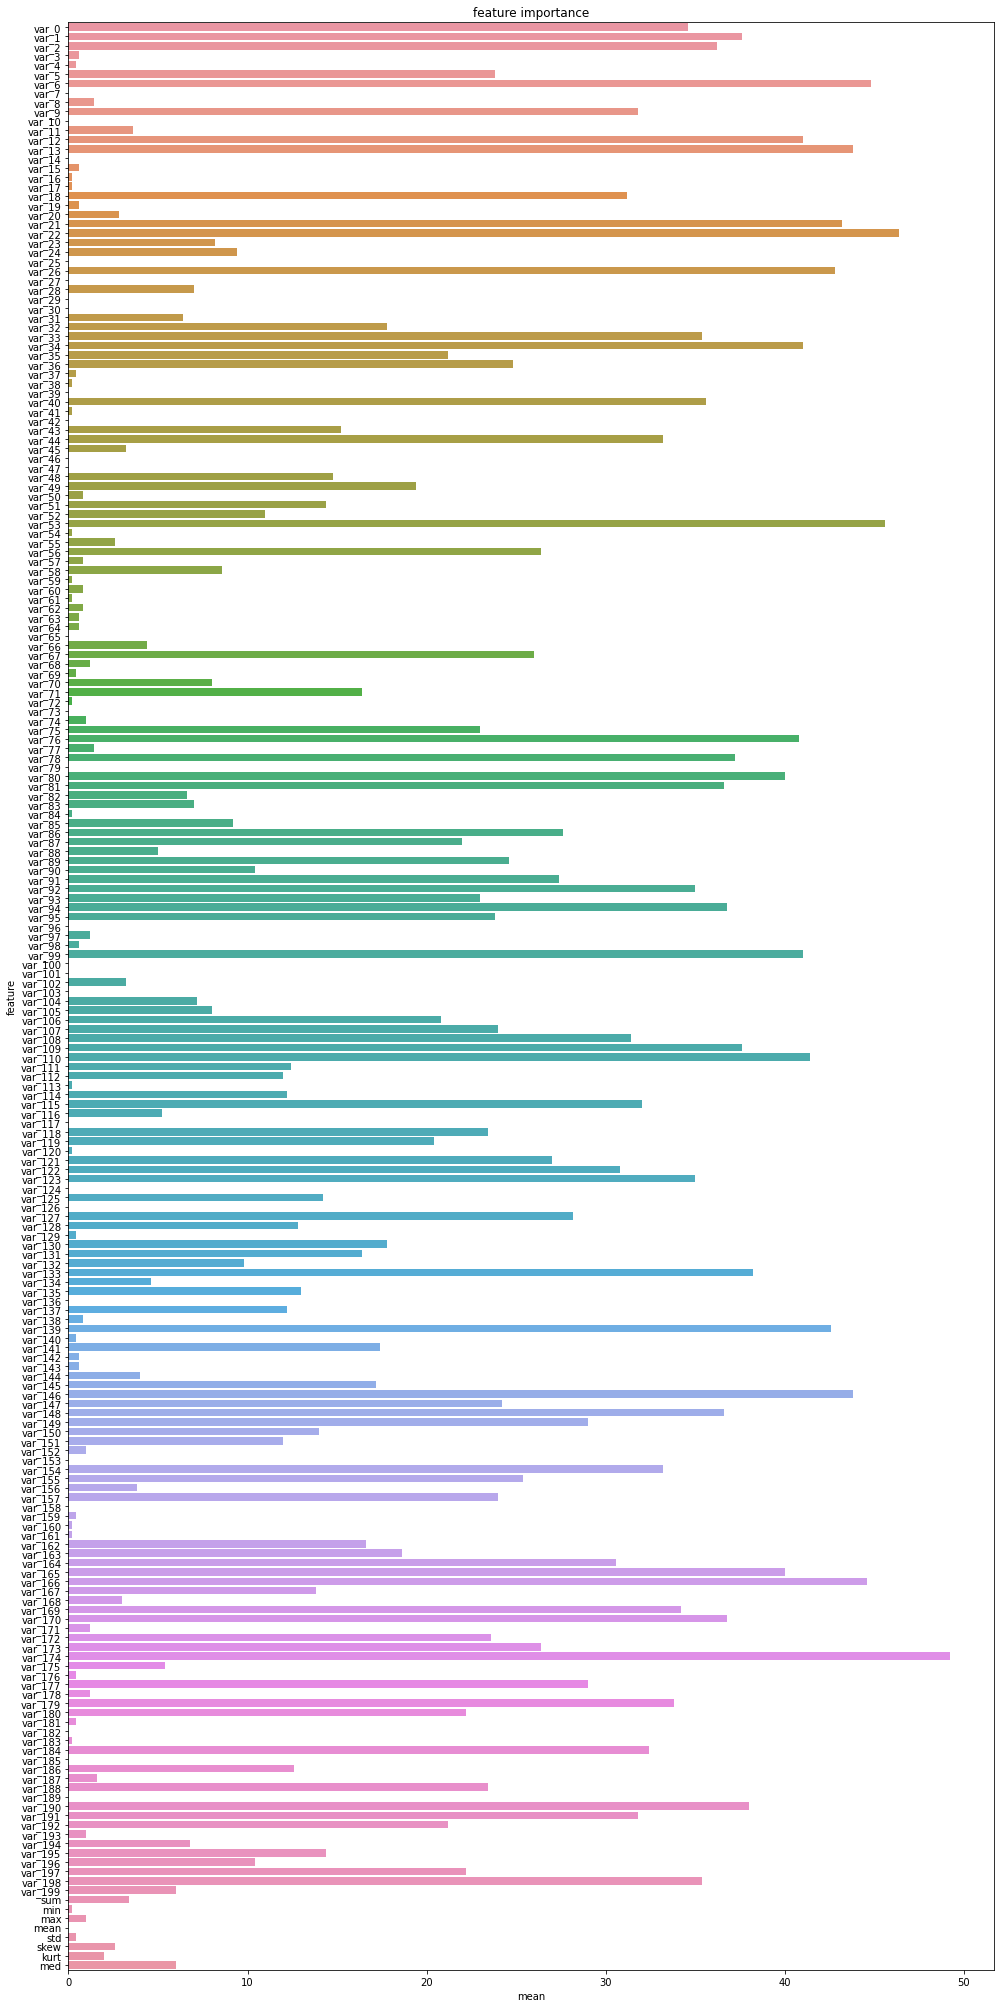

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 28))
sns.barplot(x="mean", y="feature", data=importance_all)
plt.title("feature importance")
plt.tight_layout()
#plt.savefig("featImportance.png")

In [ ]:
from sklearn import linear_model

def run_lr(fold):
    df = train
    
    features = [f for f in df.columns if f not in ("ID_code", "target", "kfold")]
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    scaler = preprocessing.StandardScaler()
    xtrain = scaler.fit_transform(df_train[features]) 
    ytrain = df_train.target.values
    
    xvalid = scaler.fit_transform(df_train[features]) 
    yvalid = df_train.target.values
    
    clf = linear_model.LogisticRegression()
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    

In [ ]:
for j in range(5):
    run_lr(j)

In [ ]:
from sklearn import ensemble

def run_rf(fold):
    df = train
    
    features = [f for f in df.columns if f not in ("ID_code", "target", "kfold")]
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    scaler = preprocessing.StandardScaler()
    xtrain = scaler.fit_transform(df_train[features]) 
    ytrain = df_train.target.values
    
    xvalid = scaler.fit_transform(df_train[features]) 
    yvalid = df_train.target.values
    
    clf = ensemble.RandomForestClassifier(n_jobs=1)
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    

In [ ]:
#for j in range(5):
#    run_rf(j)

In [ ]:
    test = pd.read_csv("../input/test.csv")
    xtest = test.drop("ID_code", axis=1)
    xtest = scaler.fit_transform(xtest)
    
    #sub = pd.DataFrame({"ID_code": test["ID_code"].values})
    preds = clf.predict(xtest)
    print(type(preds))
    print(preds)

In [132]:
for j in range(5):
    run_lr(j)

Fold 0, Accuracy=0.916
Fold 1, Accuracy=0.916
Fold 2, Accuracy=0.916
Fold 3, Accuracy=0.916
Fold 4, Accuracy=0.916


In [135]:
from sklearn import ensemble

def run_rf(fold):
    df = train
    
    features = [f for f in df.columns if f not in ("ID_code", "target", "kfold")]
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    scaler = preprocessing.StandardScaler()
    xtrain = scaler.fit_transform(df_train[features]) 
    ytrain = df_train.target.values
    
    xvalid = scaler.fit_transform(df_train[features]) 
    yvalid = df_train.target.values
    
    clf = ensemble.RandomForestClassifier(n_jobs=1)
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    

In [137]:
#for j in range(5):
#    run_rf(j)

In [ ]:
    test = pd.read_csv("../input/test.csv")
    xtest = test.drop("ID_code", axis=1)
    xtest = scaler.fit_transform(xtest)
    
    #sub = pd.DataFrame({"ID_code": test["ID_code"].values})
    preds = clf.predict(xtest)
    print(type(preds))
    print(preds)